In [1]:
import numpy as np
import pandas
import sklearn
import shap

shap.initjs()

In [2]:
# Load EEG data (already processed) from other notebook to be reworked
import pickle
with open("shapX.pkl", "rb") as file:
    X_train, X_test = pickle.load(file)
    file.close()
with open("shapY.pkl", "rb") as file:
    Y_train, Y_test = pickle.load(file)
    file.close()

In [3]:
def SHAP_format(input, labels, columns):
    # reformat data into pandas DF that SHAP expects
    epochs = input.shape[0]
    features = input.shape[1]
    samples = input.shape[2]
    temp = np.reshape(input, (features, epochs*samples)).transpose((1, 0))
    outX = pandas.DataFrame(data=temp, index=range(epochs*samples), columns=columns)
    outY = np.repeat(labels, samples)

    return outX, outY

channels = ['Fz', 'FCz', 'Cz', 'CPz', 'Pz', 'C1', 'C3', 'C5', 'C2', 'C4', 'C6', 'F4', 'FC2', 'FC4', 'FC6', 'CP2', 'CP4', 'CP6', 'P4', 'F3', 'FC1', 'FC3', 'FC5', 'CP1', 'CP3', 'CP5', 'P3']
X_train, Y_train = SHAP_format(X_train, Y_train, channels)
X_test, Y_test = SHAP_format(X_test, Y_test, channels)
X = pandas.concat([X_train, X_test])
Y = np.concatenate([Y_train, Y_test])

In [4]:
knn = sklearn.neighbors.KNeighborsClassifier()
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [5]:
f = lambda x: knn.predict_proba(x)[:,1]
med = X_train.median().values.reshape((1,X_train.shape[1]))
explainer = shap.KernelExplainer(f, med)
shap_values_single = explainer.shap_values(X.iloc[0,:], nsamples=1000)
shap.force_plot(explainer.expected_value, shap_values_single, X.iloc[0,:])

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 


In [6]:
shap_values = explainer.shap_values(X_test.iloc[0:1000,:], nsamples=1000)
shap.force_plot(explainer.expected_value, shap_values, X_test.iloc[0:1000,:])

  0%|          | 0/1000 [00:00<?, ?it/s]

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
The d

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

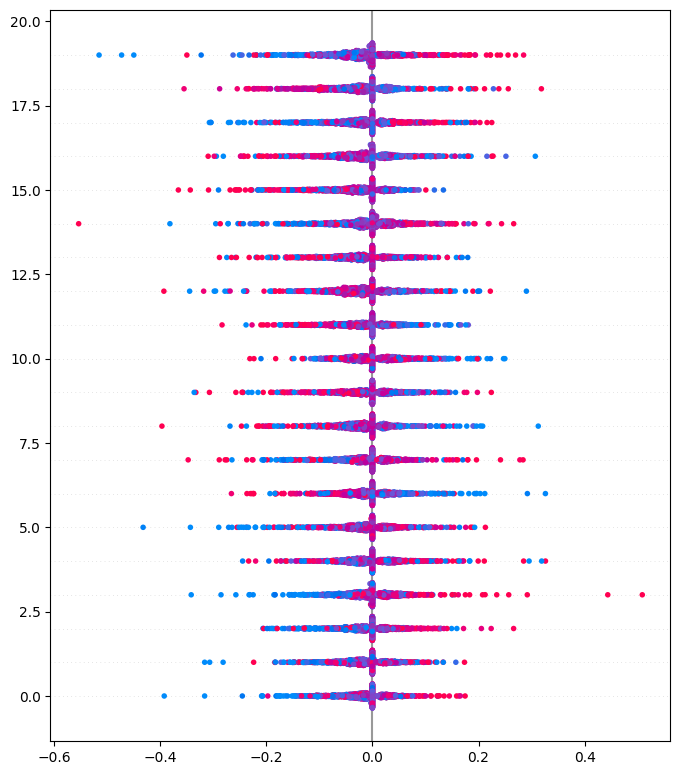

In [7]:
shap.summary_plot(shap_values, X_test.iloc[0:1000,:])